# Step One: Getting Data

### Download stock data and save it as csv

In [1]:
# Import requirements
import subprocess, os
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [2]:
# Choose stock and frequency
coin = 'BTC'
freq = 'daily'
market = 'USD'
folder = 'stocks/'
base_wd = '/Users/jeffrey_yuan/Documents/8_Projects/algotrading/'
os.chdir(base_wd)

In [3]:
# Call save_crypto_to_csv on crypto
os.chdir(base_wd+folder)
print(os.getcwd())
print(os.listdir())
subprocess.call(['python','save_crypto_to_csv.py', coin, market, freq])

/Users/jeffrey_yuan/Documents/8_Projects/algotrading/stocks
['AMZN_daily_adj.csv', 'AAPL_daily.csv', 'MSFT_daily_adj.csv', 'AAPL_intraday.csv', 'BAC_daily_adj.csv', 'AAPL_daily_adj.csv', 'ILMN_daily_adj.csv', 'GOOGL_daily_adj.csv', 'save_crypto_to_csv.py', 'FB_daily_adj.csv', 'SQ_daily_adj.csv', 'ABNB_daily_adj.csv', 'BAC_daily.csv', 'ZIM_daily.csv', 'creds.json', 'LAC_daily_adj.csv', 'ABNB_intraday.csv', 'ZIM_intraday.csv', 'SPY_daily_adj.csv', 'SQ_intraday.csv', 'ABNB_daily.csv', 'TSLA_daily.csv', 'ZIM_daily_adj.csv', 'save_data_to_csv.py', '.ipynb_checkpoints', 'BAC_intraday.csv', 'JPM_daily_adj.csv', 'TSLA_daily_adj.csv', 'C_daily_adj.csv', 'BTC_USD_daily.csv', 'GOOG_daily_adj.csv', 'MSFT_daily.csv']


0

In [4]:
# Show files in directory to confirm new file
print(os.getcwd())
sorted(os.listdir(base_wd+folder))

/Users/jeffrey_yuan/Documents/8_Projects/algotrading/stocks


['.ipynb_checkpoints',
 'AAPL_daily.csv',
 'AAPL_daily_adj.csv',
 'AAPL_intraday.csv',
 'ABNB_daily.csv',
 'ABNB_daily_adj.csv',
 'ABNB_intraday.csv',
 'AMZN_daily_adj.csv',
 'BAC_daily.csv',
 'BAC_daily_adj.csv',
 'BAC_intraday.csv',
 'BTC_USD_daily.csv',
 'C_daily_adj.csv',
 'FB_daily_adj.csv',
 'GOOGL_daily_adj.csv',
 'GOOG_daily_adj.csv',
 'ILMN_daily_adj.csv',
 'JPM_daily_adj.csv',
 'LAC_daily_adj.csv',
 'MSFT_daily.csv',
 'MSFT_daily_adj.csv',
 'SPY_daily_adj.csv',
 'SQ_daily_adj.csv',
 'SQ_intraday.csv',
 'TSLA_daily.csv',
 'TSLA_daily_adj.csv',
 'ZIM_daily.csv',
 'ZIM_daily_adj.csv',
 'ZIM_intraday.csv',
 'creds.json',
 'save_crypto_to_csv.py',
 'save_data_to_csv.py']

### Taking a first look at the daily data

In [5]:
# Crypto
os.chdir(base_wd)
csv_path = "{}{}_{}_{}.csv".format(folder, coin, market, freq)
daily = pd.read_csv(csv_path)

In [6]:
# See what the data looks like
print(daily)
for col in daily.columns:
    print(col)

           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0    2021-10-31        61859.19        61859.19        62399.00   
1    2021-10-30        62253.70        62253.70        62359.25   
2    2021-10-29        60575.90        60575.90        62980.00   
3    2021-10-28        58413.44        58413.44        62499.00   
4    2021-10-27        60328.81        60328.81        61496.00   
..          ...             ...             ...             ...   
995  2019-02-09         3660.27         3660.27         3680.02   
996  2019-02-08         3398.40         3398.40         3733.58   
997  2019-02-07         3407.00         3407.00         3426.45   
998  2019-02-06         3471.57         3471.57         3482.72   
999  2019-02-05         3463.22         3463.22         3478.97   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0          62399.00       61859.18       61859.18         62300.33   
1          62359.25       60673.00       60673.00      

In [7]:
# Print the last 6 days worth of data
print(daily[:6])

         date  1a. open (USD)  1b. open (USD)  2a. high (USD)  2b. high (USD)  \
0  2021-10-31        61859.19        61859.19        62399.00        62399.00   
1  2021-10-30        62253.70        62253.70        62359.25        62359.25   
2  2021-10-29        60575.90        60575.90        62980.00        62980.00   
3  2021-10-28        58413.44        58413.44        62499.00        62499.00   
4  2021-10-27        60328.81        60328.81        61496.00        61496.00   
5  2021-10-26        63078.78        63078.78        63293.48        63293.48   

   3a. low (USD)  3b. low (USD)  4a. close (USD)  4b. close (USD)  \
0       61859.18       61859.18         62300.33         62300.33   
1       60673.00       60673.00         61859.19         61859.19   
2       60174.81       60174.81         62253.71         62253.71   
3       57820.00       57820.00         60575.89         60575.89   
4       58000.00       58000.00         58413.44         58413.44   
5       59817.55  

In [27]:
# Print just the close
close_lab = "4b. close (USD)"
print(daily[close_lab][:6])

0    60501.56
1    60575.89
2    58413.44
3    60328.81
4    63078.78
5    60852.22
Name: 4b. close (USD), dtype: float64


In [21]:
# Reverse data to get chronological order
rev_daily = daily.iloc[::-1]

In [22]:
# See what the reversed data looks like
print(rev_daily)
for col in rev_daily.columns:
    print(col)

           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31        3433.31      

# Step Two: Calculating Technical Indicators

### Averages

In [28]:
# SMA - Simple Moving Average
# Use built-in function to calculate SMA on daily data
length = 6
#rev_daily = rev_daily.drop(columns=["6-day SMA"])
print(rev_daily)
rev_daily["6-day SMA"] = rev_daily.rolling(window=length)[close_lab].mean()
print(rev_daily)

           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31        3433.31      

/Users/jeffrey_yuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# SMA Add Function
def add_sma(data, header, length, label):
    data[label] = data.rolling(window=length)[header].mean()

In [30]:
# Test SMA Add Function
header = close_lab
length = 6
label = "{}-day SMA".format(length)
rev_daily = rev_daily.drop(columns=[label])
print("Before adding SMA")
print(rev_daily)
add_sma(rev_daily, header, length, label)
print("\nAfter adding SMA")
print(rev_daily)

Before adding SMA
           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31   

In [31]:
# It is common to look at 50-, 100-, and 200-day moving averages
# If 50-day is above 200-day moving average, stock is bullish. A crossover to the downside is bearish.
length = 50
label = "{}-day SMA".format(length)
add_sma(rev_daily, header, length, label)
length = 100
label = "{}-day SMA".format(length)
add_sma(rev_daily, header, length, label)
length = 200
label = "{}-day SMA".format(length)
add_sma(rev_daily, header, length, label)
print(rev_daily)

           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31        3433.31      

In [32]:
# EMA - Exponential Moving Average
# Use built-in function to calculate EMA on daily data
# Note: Span follows the following formula:
# Specify decay in terms of span, 𝛼=2/(𝑠𝑝𝑎𝑛+1), for 𝑠𝑝𝑎𝑛≥1.
length = 6
rev_daily["6-day EMA"] = rev_daily.ewm(span=length)[close_lab].mean()
print(rev_daily)

           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31        3433.31      

In [33]:
# EMA Add Function
def add_ema(data, header, length, label):
    data[label] = data.ewm(span=length)[header].mean()

In [34]:
# Test EMA Add Function
header = close_lab
length = 6
label = "{}-day EMA".format(length)
rev_daily = rev_daily.drop(columns=[label])
print("Before adding EMA")
print(rev_daily)
add_ema(rev_daily, header, length, label)
print("\nAfter adding EMA")
print(rev_daily)

Before adding EMA
           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31   

In [35]:
# MACD - Moving Average Convergence Divergence
# Calculated as MACD = EMA(short) - EMA(long)
short = 12
long = 26
header = close_lab
short_lab = "{}-day EMA".format(short)
long_lab = "{}-day EMA".format(long)
add_ema(rev_daily, header, short, short_lab)
add_ema(rev_daily, header, long, long_lab)
rev_daily["MACD"] = rev_daily.loc[:,short_lab] - rev_daily.loc[:,long_lab]
print(rev_daily)

           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31        3433.31      

In [36]:
# MACD Add Function
def add_macd(data, header, short, short_lab, long, long_lab):
    add_ema(data, header, short, short_lab)
    add_ema(data, header, long, long_lab)
    data["MACD"] = data.loc[:,short_lab] - data.loc[:,long_lab]

In [37]:
# Test MACD Add Function
header = close_lab
short = 12
long = 26
short_lab = "{}-day EMA".format(short)
long_lab = "{}-day EMA".format(long)
rev_daily = rev_daily.drop(columns=["MACD"])
print("Before adding MACD")
print(rev_daily)
add_macd(rev_daily, header, short, short_lab, long, long_lab)
print("\nAfter adding MACD")
print(rev_daily)

Before adding MACD
           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31  

In [38]:
# MACD signal line
macd_sig_head = "MACD"
macd_sig_len = 9
macd_sig_lab = "9-day MACD EMA"
add_ema(rev_daily, macd_sig_head, macd_sig_len, macd_sig_lab)
print(rev_daily)

           date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
999  2019-02-03         3504.06         3504.06         3511.09   
998  2019-02-04         3458.11         3458.11         3484.88   
997  2019-02-05         3463.22         3463.22         3478.97   
996  2019-02-06         3471.57         3471.57         3482.72   
995  2019-02-07         3407.00         3407.00         3426.45   
..          ...             ...             ...             ...   
4    2021-10-25        60852.22        60852.22        63710.63   
3    2021-10-26        63078.78        63078.78        63293.48   
2    2021-10-27        60328.81        60328.81        61496.00   
1    2021-10-28        58413.44        58413.44        62499.00   
0    2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
999         3511.09        3426.00        3426.00          3458.11   
998         3484.88        3433.31        3433.31      

## Plotting MACD

In [39]:
rev_daily = rev_daily.reset_index()
print(rev_daily)

     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0           3511.09        3426.00       

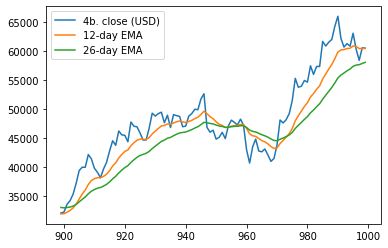

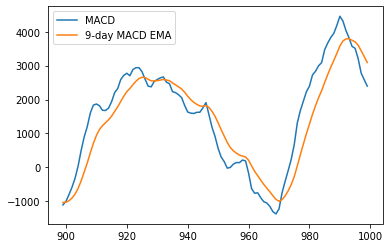

In [40]:
num_days = 100
end_index = rev_daily["index"][0]
start_index = end_index - num_days
rev_daily.iloc[start_index:end_index + 1].plot(y=[close_lab, "12-day EMA", "26-day EMA"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD", "9-day MACD EMA"])

## MACD decision points

In [41]:
rev_daily["MACD Signals"] = rev_daily.loc[:,"MACD"] - rev_daily.loc[:,"9-day MACD EMA"]
#print(rev_daily)
rev_daily["MACD Bull"] = np.where((rev_daily["MACD Signals"] > 0) & (rev_daily["MACD Signals"].shift() < 0), 1, 0)
#print(rev_daily.loc[rev_daily["MACD bull"] == 1])
rev_daily["MACD Bear"] = np.where((rev_daily["MACD Signals"] < 0) & (rev_daily["MACD Signals"].shift() > 0), 1, 0)
#print(rev_daily.loc[rev_daily["MACD bear"] == 1])
print(rev_daily)

     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0           3511.09        3426.00       

In [42]:
# Change in MACD
rev_daily["MACD Change"] = rev_daily["MACD"] - rev_daily["MACD"].shift()
print(rev_daily[["MACD", "9-day MACD EMA", "MACD Change"]])

            MACD  9-day MACD EMA  MACD Change
0       0.000000        0.000000          NaN
1       0.114647        0.063693     0.114647
2       0.405637        0.203834     0.290989
3      -1.862805       -0.496247    -2.268441
4      -3.333577       -1.340289    -1.470773
..           ...             ...          ...
995  3509.271485     3699.960021   -57.916653
996  3204.532666     3600.874550  -304.738819
997  2776.465242     3435.992688  -428.067424
998  2581.947286     3265.183608  -194.517956
999  2394.193818     3090.985650  -187.753467

[1000 rows x 3 columns]


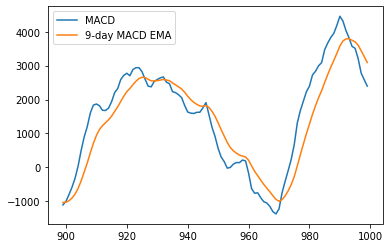

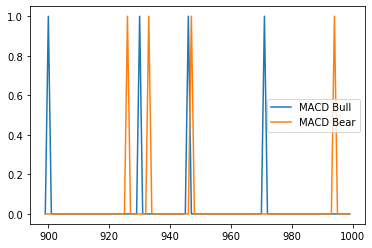

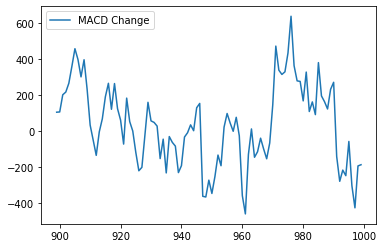

In [43]:
# Plot MACD with decision points
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD", "9-day MACD EMA"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD Bull", "MACD Bear"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD Change"])
#rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD Bull", "MACD Bear"], kind="bar", color=["green", "red"])
## TODO: Bar charts aren't working properly

## RSI

In [44]:
# RSI - Relative Strength Indicator
# Magnitude of recent price changes, indicate overbought or oversold conditions
# Oscillator with values from 0 to 100
# Over-bought/over-valued: RSI >= 70
# Under-bought/under-valued: RSI <= 30
# Need change in price per period
rev_daily["Close Change"] = rev_daily[close_lab] - rev_daily[close_lab].shift()
rev_daily["Up Changes"] = np.where(rev_daily["Close Change"] > 0, rev_daily["Close Change"], 0)
rev_daily["Down Changes"] = np.where(rev_daily["Close Change"] < 0, abs(rev_daily["Close Change"]), 0)
rsi_length = 14
add_sma(rev_daily, "Up Changes", rsi_length, "Up Avg")
add_sma(rev_daily, "Down Changes", rsi_length, "Down Avg")
rev_daily["RSI"] = 100 - (100 / (1 + (rev_daily["Up Avg"] / rev_daily["Down Avg"])))
print(rev_daily)

     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0           3511.09        3426.00       

In [45]:
# RSI Add Function
def add_rsi(data, header, length, label):
    data["Close Change"] = data[header] - data[header].shift()
    data["Up Changes"] = np.where(data["Close Change"] > 0, data["Close Change"], 0)
    data["Down Changes"] = np.where(data["Close Change"] < 0, abs(data["Close Change"]), 0)
    add_sma(data, "Up Changes", length, "Up Avg")
    add_sma(data, "Down Changes", length, "Down Avg")
    data[label] = 100 - (100 / (1 + (data["Up Avg"] / data["Down Avg"])))
    data = data.drop(columns=["Close Change", "Up Changes", "Down Changes", "Up Avg", "Down Avg"])

In [46]:
# Test RSI Add Function
header = close_lab
length = 14
label = "14-day RSI"
rev_daily = rev_daily.drop(columns=["Close Change", "Up Changes", "Down Changes", "Up Avg", "Down Avg"])
print("Before adding RSI")
print(rev_daily)
add_rsi(rev_daily, header, length, label)
print("\nAfter adding RSI")
print(rev_daily)

Before adding RSI
     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0           3511.09    

## RSI Decision Points

In [47]:
rev_daily["RSI Overbought"] = np.where(rev_daily["RSI"] >= 70, 1, 0)
rev_daily["RSI Oversold"] = np.where(rev_daily["RSI"] <= 30, 1, 0)
print(rev_daily)

     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0           3511.09        3426.00       

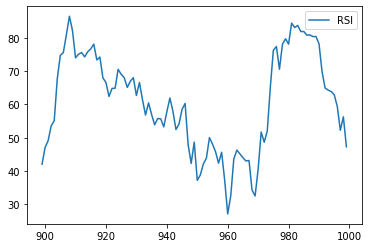

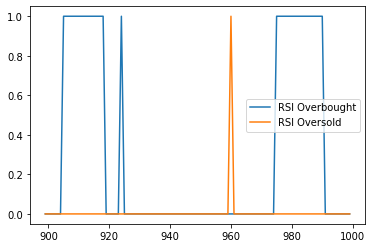

In [48]:
# Plot RSI with decision points
rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI Overbought", "RSI Oversold"])
#rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI Overbought", "RSI Oversold"], kind="bar", color=["red", "green"])

## Bollinger Bands

In [49]:
# STD Add Function
def add_std(data, header, length, label):
    data[label] = data.rolling(window=length)[header].std(ddof = 0)

In [50]:
# Bollinger Bands
# Upper and lower bounds of price based on standard deviations
# BOL UP = SMA(TP, n) + m*sigma(TP, n)
# BOL DW = SMA(TP, n) - m*sigma(TP, n)
# TP, typical price = (high + low + close) / 3
# n = number of days for average (usually 20)
# m = number of standard deviations (usually 2)
# sigma = standard deviation on TP over n days
typ_lab = "Typical Price"
high_lab = "2b. high (USD)"
low_lab = "3b. low (USD)"
close_lab = "4b. close (USD)"
rev_daily[typ_lab] = (rev_daily[high_lab] + rev_daily[low_lab] + rev_daily[close_lab]) / 3
n = 20
m = 2
typ_sma_lab = "Typical 20-day SMA"
add_sma(rev_daily, typ_lab, n, typ_sma_lab)
typ_std_lab = "Typical 20-day STD"
add_std(rev_daily, typ_lab, n, typ_std_lab)
rev_daily["Bollinger Upper"] = rev_daily[typ_sma_lab] + m*rev_daily[typ_std_lab]
rev_daily["Bollinger Lower"] = rev_daily[typ_sma_lab] - m*rev_daily[typ_std_lab]
rev_daily
# NOTE: Width is just equal to 2*m*std
#rev_daily["Bollinger Width"] = rev_daily["Bollinger Upper"] - rev_daily["Bollinger Lower"]
#rev_daily.drop(columns=["Bollinger Width"])


,index,date,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),...,Up Avg,Down Avg,14-day RSI,RSI Overbought,RSI Oversold,Typical Price,Typical 20-day SMA,Typical 20-day STD,Bollinger Upper,Bollinger Lower
0,999,2019-02-03,3504.06,3504.06,3511.09,3511.09,3426.00,3426.00,3458.11,3458.11,...,NaN,NaN,NaN,0,0,3465.066667,NaN,NaN,NaN,NaN
1,998,2019-02-04,3458.11,3458.11,3484.88,3484.88,3433.31,3433.31,3463.22,3463.22,...,NaN,NaN,NaN,0,0,3460.470000,NaN,NaN,NaN,NaN
2,997,2019-02-05,3463.22,3463.22,3478.97,3478.97,3448.43,3448.43,3471.59,3471.59,...,NaN,NaN,NaN,0,0,3466.330000,NaN,NaN,NaN,NaN
3,996,2019-02-06,3471.57,3471.57,3482.72,3482.72,3380.00,3380.00,3405.37,3405.37,...,NaN,NaN,NaN,0,0,3422.696667,NaN,NaN,NaN,NaN
4,995,2019-02-07,3407.00,3407.00,3426.45,3426.45,3390.00,3390.00,3398.40,3398.40,...,NaN,NaN,NaN,0,0,3404.950000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2021-10-25,60852.22,60852.22,63710.63,63710.63,60650.00,60650.00,63078.78,63078.78,...,974.677143,574.146429,62.930159,0,0,62479.803333,59027.098333,3543.174104,66113.446542,51940.750124
996,3,2021-10-26,63078.78,63078.78,63293.48,63293.48,59817.55,59817.55,60328.81,60328.81,...,974.677143,665.257143,59.433915,0,0,61146.613333,59393.638833,3359.533927,66112.706688,52674.570979
997,2,2021-10-27,60328.81,60328.81,61496.00,61496.00,58000.00,58000.00,58413.44,58413.44,...,876.815000,802.069286,52.226053,0,0,59303.146667,59650.887333,3138.502454,65927.892242,53373.882425
998,1,2021-10-28,58413.44,58413.44,62499.00,62499.00,57820.00,57820.00,60575.89,60575.89,...,1031.275714,800.707857,56.292847,0,0,60298.296667,59937.984833,2913.934178,65765.853189,54110.116478


In [51]:
# Typical Price Add Function
def add_typ(data, high_head, low_head, close_head, label):
    data[label] = (data[high_head] + data[low_head] + data[close_head]) / 3

# Bollinger Bands Add Function
def add_bolls(data, header, length, num_sds, sma_lab, std_lab, upper_label, lower_label):
    add_sma(data, header, length, sma_lab)
    add_std(data, header, length, std_lab)
    data[upper_label] = data[sma_lab] + num_sds*data[std_lab]
    data[lower_label] = data[sma_lab] - num_sds*data[std_lab]

In [52]:
# Test Bollinger Bands Add Function
typ_lab = "Typical Price"
typ_sma_lab = "Typical 20-day SMA"
typ_std_lab = "Typical 20-day STD"
boll_up_lab = "Bollinger Upper"
boll_low_lab = "Bollinger Lower"
# Reset data frame
rev_daily = rev_daily.drop(columns=[typ_lab, typ_sma_lab, typ_std_lab, boll_up_lab, boll_low_lab])

print("Before adding Bollinger Bands")
print(rev_daily)

# Add typical price
high_head = "2b. high (USD)"
low_head = "3b. low (USD)"
close_head = "4b. close (USD)"
add_typ(rev_daily, high_head, low_head, close_head, typ_lab)

# Add Bollinger Bands
length = 20
num_sds = 2
add_bolls(rev_daily, typ_lab, length, num_sds, typ_sma_lab, typ_std_lab, boll_up_lab, boll_low_lab)
print("\nAfter adding Bollinger Bands")
print(rev_daily)

Before adding Bollinger Bands
     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0          

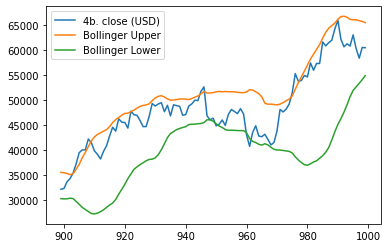

In [53]:
# Plot Bollinger Bands
rev_daily.iloc[start_index:end_index + 1].plot(y=[close_head, boll_up_lab, boll_low_lab])

## On-Balance Volume

In [57]:
# On-Balance Volume
# Trading momentum indicator
# OBV = OBV_prev + signed_volume
# signed_volume = +volume if close > close_prev, 0 if close = close_prev, and -volume if close < close_prev
# Usually change in OBV (over several days) is used rather than absolute value
# If OBV changes dramatically but price doesn't match change, then it will likely spring up or down matching OBV
vol_head = "5. volume"
close_head = close_lab
obv_lab = "OBV"
rev_daily[obv_lab] = np.where(rev_daily[close_head] > rev_daily[close_head].shift(), 
    rev_daily[vol_head], 
    np.where(rev_daily[close_head] < rev_daily[close_head].shift(), 
             -rev_daily[vol_head],
             np.where(rev_daily.index == 0, rev_daily[vol_head], 0))).cumsum()

obv_ch_lab = "OBV Change"
obv_ch_len = 1
rev_daily[obv_ch_lab] = rev_daily[obv_lab] - rev_daily[obv_lab].shift(obv_ch_len)
rev_daily

,index,date,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),...,14-day RSI,RSI Overbought,RSI Oversold,Typical Price,Typical 20-day SMA,Typical 20-day STD,Bollinger Upper,Bollinger Lower,OBV,OBV Change
0,999,2019-02-03,3504.06,3504.06,3511.09,3511.09,3426.00,3426.00,3458.11,3458.11,...,NaN,0,0,3465.066667,NaN,NaN,NaN,NaN,1.986734e+04,NaN
1,998,2019-02-04,3458.11,3458.11,3484.88,3484.88,3433.31,3433.31,3463.22,3463.22,...,NaN,0,0,3460.470000,NaN,NaN,NaN,NaN,4.299932e+04,23131.981108
2,997,2019-02-05,3463.22,3463.22,3478.97,3478.97,3448.43,3448.43,3471.59,3471.59,...,NaN,0,0,3466.330000,NaN,NaN,NaN,NaN,6.826373e+04,25264.415030
3,996,2019-02-06,3471.57,3471.57,3482.72,3482.72,3380.00,3380.00,3405.37,3405.37,...,NaN,0,0,3422.696667,NaN,NaN,NaN,NaN,3.295349e+04,-35310.244846
4,995,2019-02-07,3407.00,3407.00,3426.45,3426.45,3390.00,3390.00,3398.40,3398.40,...,NaN,0,0,3404.950000,NaN,NaN,NaN,NaN,1.428795e+04,-18665.538638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2021-10-25,60852.22,60852.22,63710.63,63710.63,60650.00,60650.00,63078.78,63078.78,...,62.930159,0,0,62479.803333,59027.098333,3543.174104,66113.446542,51940.750124,4.497832e+06,36853.838060
996,3,2021-10-26,63078.78,63078.78,63293.48,63293.48,59817.55,59817.55,60328.81,60328.81,...,59.433915,0,0,61146.613333,59393.638833,3359.533927,66112.706688,52674.570979,4.457614e+06,-40217.500830
997,2,2021-10-27,60328.81,60328.81,61496.00,61496.00,58000.00,58000.00,58413.44,58413.44,...,52.226053,0,0,59303.146667,59650.887333,3138.502454,65927.892242,53373.882425,4.395490e+06,-62124.490160
998,1,2021-10-28,58413.44,58413.44,62499.00,62499.00,57820.00,57820.00,60575.89,60575.89,...,56.292847,0,0,60298.296667,59937.984833,2913.934178,65765.853189,54110.116478,4.456546e+06,61056.353010


In [58]:
# On Balance Volume Add Function
def add_obv(data, vol_header, price_header, label):
    data[label] = np.where(data[price_header] > data[price_header].shift(), 
    data[vol_header], 
    np.where(data[price_header] < data[price_header].shift(), 
             -data[vol_header],
             np.where(data.index == 0, data[vol_header], 0))).cumsum()

def add_obv_change(data, obv_label, length, change_label):
    data[change_label] = data[obv_label] - data[obv_label].shift(length)

In [59]:
# Test On Balance Volume Add Function
obv_lab = "OBV"
obv_change_lab = "OBV Change"
# Reset data frame
rev_daily = rev_daily.drop(columns=[obv_lab, obv_change_lab])

print("Before adding OBV")
print(rev_daily)

vol_head = "5. volume"
close_head = close_lab
add_obv(rev_daily, vol_head, close_head, obv_lab)
obv_len = 10
add_obv_change(rev_daily, obv_lab, obv_len, obv_change_lab)

print("\nAfter adding OBV")
print(rev_daily)

Before adding OBV
     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0           3511.09    

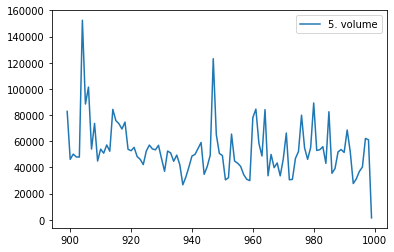

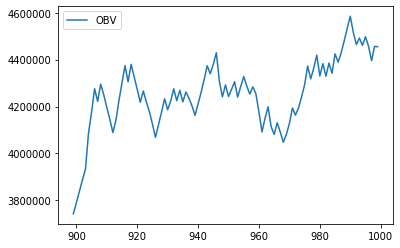

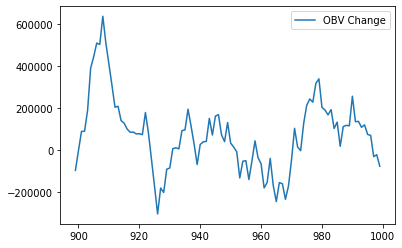

In [60]:
# Plot OBV
rev_daily.iloc[start_index:end_index + 1].plot(y=[vol_head])
rev_daily.iloc[start_index:end_index + 1].plot(y=[obv_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[obv_change_lab])

In [61]:
# Accumulation/distribution Indicator
# Cumulative indicator for how well volume and price are tracking together
# Money Flow Multiplier, MFM = ((Close - Low) - (High - Close)) / (High - Low)
# Money Flow Volume, MFV = MFM * Volume
# Accumulation/distribution, AD = AD_prev + MFV
high_head = "2b. high (USD)"
low_head = "3b. low (USD)"
close_head = "4b. close (USD)"
vol_head = "5. volume"
mfm_lab = "MFM"
rev_daily[mfm_lab] = (((rev_daily[close_head] - rev_daily[low_head]) - (rev_daily[high_head] - rev_daily[close_head])) / 
                      (rev_daily[high_head] - rev_daily[low_head]))
ad_lab = "ADI"
rev_daily[ad_lab] = np.where(rev_daily.index == 0, 0, rev_daily[mfm_lab] * rev_daily[vol_head]).cumsum()
rev_daily

,index,date,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),...,RSI Oversold,Typical Price,Typical 20-day SMA,Typical 20-day STD,Bollinger Upper,Bollinger Lower,OBV,OBV Change,MFM,ADI
0,999,2019-02-03,3504.06,3504.06,3511.09,3511.09,3426.00,3426.00,3458.11,3458.11,...,0,3465.066667,NaN,NaN,NaN,NaN,1.986734e+04,NaN,-0.245270,0.000000e+00
1,998,2019-02-04,3458.11,3458.11,3484.88,3484.88,3433.31,3433.31,3463.22,3463.22,...,0,3460.470000,NaN,NaN,NaN,NaN,4.299932e+04,NaN,0.159977,3.700579e+03
2,997,2019-02-05,3463.22,3463.22,3478.97,3478.97,3448.43,3448.43,3471.59,3471.59,...,0,3466.330000,NaN,NaN,NaN,NaN,6.826373e+04,NaN,0.516699,1.675469e+04
3,996,2019-02-06,3471.57,3471.57,3482.72,3482.72,3380.00,3380.00,3405.37,3405.37,...,0,3422.696667,NaN,NaN,NaN,NaN,3.295349e+04,NaN,-0.506036,-1.113562e+03
4,995,2019-02-07,3407.00,3407.00,3426.45,3426.45,3390.00,3390.00,3398.40,3398.40,...,0,3404.950000,NaN,NaN,NaN,NaN,1.428795e+04,NaN,-0.539095,-1.117605e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2021-10-25,60852.22,60852.22,63710.63,63710.63,60650.00,60650.00,63078.78,63078.78,...,0,62479.803333,59027.098333,3543.174104,66113.446542,51940.750124,4.497832e+06,73083.045170,0.587111,8.442536e+06
996,3,2021-10-26,63078.78,63078.78,63293.48,63293.48,59817.55,59817.55,60328.81,60328.81,...,0,61146.613333,59393.638833,3359.533927,66112.706688,52674.570979,4.457614e+06,68333.425300,-0.705828,8.414149e+06
997,2,2021-10-27,60328.81,60328.81,61496.00,61496.00,58000.00,58000.00,58413.44,58413.44,...,0,59303.146667,59650.887333,3138.502454,65927.892242,53373.882425,4.395490e+06,-32890.306100,-0.763478,8.366718e+06
998,1,2021-10-28,58413.44,58413.44,62499.00,62499.00,57820.00,57820.00,60575.89,60575.89,...,0,60298.296667,59937.984833,2913.934178,65765.853189,54110.116478,4.456546e+06,-23632.401530,0.177982,8.377585e+06


In [62]:
# Accumulation/Distribution Indicator Add Function
def add_adi(data, vol_header, low_header, high_header, close_header, mfm_label, label):
    data[mfm_label] = (((data[close_header] - data[low_header]) - (data[high_header] - data[close_header])) / 
                      (data[high_header] - data[low_header]))
    data[label] = np.where(data.index == 0, 0, data[mfm_label] * data[vol_header]).cumsum()

In [63]:
# Test Accumulation/Distribution Indicator Add Function
mfm_lab = "MFM"
adi_lab = "ADI"
# Reset data frame
rev_daily = rev_daily.drop(columns=[mfm_lab, adi_lab])

print("Before adding ADI")
print(rev_daily)

high_head = "2b. high (USD)"
low_head = "3b. low (USD)"
close_head = "4b. close (USD)"
vol_head = "5. volume"
add_adi(rev_daily, vol_head, low_head, high_head, close_head, mfm_lab, adi_lab)

print("\nAfter adding ADI")
print(rev_daily)

Before adding ADI
     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0           3511.09    

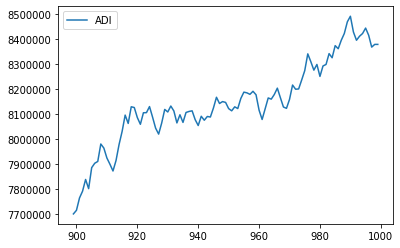

In [64]:
# Plot ADI
rev_daily.iloc[start_index:end_index + 1].plot(y=[adi_lab])

In [66]:
# Stochastic Oscillator
# Compares a closing price with its historical range of closing prices
# Can be adjusted by varying the time frame or taking the SMA of it
# Indicates momentum
# Ranges from 0 to 100
# %K = (C - L_14) / (H_14 - L_14) * 100
# K is the stochastic oscillator
# C is the current close
# L is the lowest close in the past 14 days (for example)
# H is the highest close in the past 14 days (for example)
# Values >80 considered overbought
# Values <20 considered oversold
close_head = close_lab
length = 14
sto_lab = "Stochastic Oscillator"
rev_daily[sto_lab] = 100*((rev_daily[close_head] - rev_daily[close_head].rolling(window=length).min()) /
                          (rev_daily[close_head].rolling(window=length).max() - rev_daily[close_head].rolling(window=length).min()))
rev_daily

,index,date,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),...,Typical Price,Typical 20-day SMA,Typical 20-day STD,Bollinger Upper,Bollinger Lower,OBV,OBV Change,MFM,ADI,Stochastic Oscillator
0,999,2019-02-03,3504.06,3504.06,3511.09,3511.09,3426.00,3426.00,3458.11,3458.11,...,3465.066667,NaN,NaN,NaN,NaN,1.986734e+04,NaN,-0.245270,0.000000e+00,NaN
1,998,2019-02-04,3458.11,3458.11,3484.88,3484.88,3433.31,3433.31,3463.22,3463.22,...,3460.470000,NaN,NaN,NaN,NaN,4.299932e+04,NaN,0.159977,3.700579e+03,NaN
2,997,2019-02-05,3463.22,3463.22,3478.97,3478.97,3448.43,3448.43,3471.59,3471.59,...,3466.330000,NaN,NaN,NaN,NaN,6.826373e+04,NaN,0.516699,1.675469e+04,NaN
3,996,2019-02-06,3471.57,3471.57,3482.72,3482.72,3380.00,3380.00,3405.37,3405.37,...,3422.696667,NaN,NaN,NaN,NaN,3.295349e+04,NaN,-0.506036,-1.113562e+03,NaN
4,995,2019-02-07,3407.00,3407.00,3426.45,3426.45,3390.00,3390.00,3398.40,3398.40,...,3404.950000,NaN,NaN,NaN,NaN,1.428795e+04,NaN,-0.539095,-1.117605e+04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2021-10-25,60852.22,60852.22,63710.63,63710.63,60650.00,60650.00,63078.78,63078.78,...,62479.803333,59027.098333,3543.174104,66113.446542,51940.750124,4.497832e+06,73083.045170,0.587111,8.442536e+06,70.786788
996,3,2021-10-26,63078.78,63078.78,63293.48,63293.48,59817.55,59817.55,60328.81,60328.81,...,61146.613333,59393.638833,3359.533927,66112.706688,52674.570979,4.457614e+06,68333.425300,-0.705828,8.414149e+06,34.447106
997,2,2021-10-27,60328.81,60328.81,61496.00,61496.00,58000.00,58000.00,58413.44,58413.44,...,59303.146667,59650.887333,3138.502454,65927.892242,53373.882425,4.395490e+06,-32890.306100,-0.763478,8.366718e+06,12.312980
998,1,2021-10-28,58413.44,58413.44,62499.00,62499.00,57820.00,57820.00,60575.89,60575.89,...,60298.296667,59937.984833,2913.934178,65765.853189,54110.116478,4.456546e+06,-23632.401530,0.177982,8.377585e+06,28.498399


In [67]:
# Stochastic Oscillator Add Function
def add_sto(data, header, length, label):
    data[label] = 100*((data[header] - data[header].rolling(window=length).min()) /
                       (data[header].rolling(window=length).max() - data[header].rolling(window=length).min()))
    

In [68]:
# Test Stochastic Oscillator Add Function
sto_lab = "Stochastic Oscillator"
# Reset data frame
rev_daily = rev_daily.drop(columns=[sto_lab])

print("Before adding Stochastic Oscillator")
print(rev_daily)

close_head = close_lab
length = 14
add_sto(rev_daily, close_head, length, sto_lab)

print("\nAfter adding Stochastic Oscillator")
print(rev_daily)

Before adding Stochastic Oscillator
     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0    

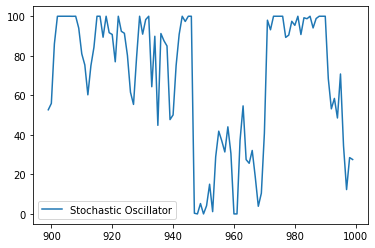

In [69]:
# Plot Stochastic Oscillator
rev_daily.iloc[start_index:end_index + 1].plot(y=[sto_lab])

In [70]:
# Average Directional Index (ADX)
# Determines the strength of a trend
# Includes 3 lines: the positive, negative, and average directional indicators
# A strong trend is when ADX > 25, weak or missing when ADX < 20
# Complicated calculation based on current and previous highs and lows
# Start with Average True Range (ATR)
# Range is high - low
# True range is high - low including yesterday's close as high or low
# Average True Range first takes the arithmetic mean of the first n periods,
# and then each subsequent one is (ATR_(t-1)*(n-1) + TR_t)/n (weighing most recent value exponentially less)
high_head = "2b. high (USD)"
low_head = "3b. low (USD)"
close_head = "4b. close (USD)"
max_lab = "True Max"
min_lab = "True Min"
tr_lab = "TR"
atr_lab = "ATR"
length = 14
rev_daily[max_lab] = np.where(rev_daily[high_head] >= rev_daily[close_head].shift(), rev_daily[high_head], rev_daily[close_head].shift())
rev_daily[min_lab] = np.where(rev_daily[low_head] < rev_daily[close_head].shift(), rev_daily[low_head], rev_daily[close_head].shift())
rev_daily[tr_lab] = rev_daily[max_lab] - rev_daily[min_lab]
def smoothed(data, lab, length):
    return np.where(data.index <= length, 
                    data[lab].rolling(window=length).mean(), 
                    (data[lab].shift()*(length - 1) + data[lab]) / length)
rev_daily[atr_lab] = smoothed(rev_daily, tr_lab, length)

# Next calculate positive and negative directional movement, PDM and NDM
# PDM is the UpMove when the current high is greater than the previous high and greater than the DownMove
# NDM is the DownMove when the previous low is greater than the current low and greater than the UpMove
um_lab = "UpMove"
dm_lab = "DownMove"
rev_daily[um_lab] = rev_daily[high_head] - rev_daily[high_head].shift()
rev_daily[dm_lab] = rev_daily[low_head].shift() - rev_daily[low_head]
pdm_lab = "+DM"
ndm_lab = "-DM"
rev_daily[pdm_lab] = np.where((rev_daily[um_lab] > rev_daily[dm_lab]) & (rev_daily[um_lab] > 0),
                             rev_daily[um_lab], 0)
rev_daily[ndm_lab] = np.where((rev_daily[dm_lab] > rev_daily[um_lab]) & (rev_daily[dm_lab] > 0),
                             rev_daily[dm_lab], 0)
# Positive and negative directional indicator, PDI and NDI
# Smoothed versions of the PDM and NDM divided by the ATR times 100
pdi_lab = "+DI"
ndi_lab = "-DI"
rev_daily[pdi_lab] = 100*smoothed(rev_daily, pdm_lab, length) / rev_daily[atr_lab]
rev_daily[ndi_lab] = 100*smoothed(rev_daily, ndm_lab, length) / rev_daily[atr_lab]
# The Average Directional Index, ADI
# ADI = 100*abs(PDI - NDI) / (PDI + NDI)
adx_lab = "ADX"
rev_daily[adx_lab] = (100*(rev_daily[pdi_lab] - rev_daily[ndi_lab]) / (rev_daily[pdi_lab] + rev_daily[ndi_lab])).abs()
rev_daily


,index,date,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),...,True Min,TR,ATR,UpMove,DownMove,+DM,-DM,+DI,-DI,ADX
0,999,2019-02-03,3504.06,3504.06,3511.09,3511.09,3426.00,3426.00,3458.11,3458.11,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN
1,998,2019-02-04,3458.11,3458.11,3484.88,3484.88,3433.31,3433.31,3463.22,3463.22,...,3433.31,51.57,NaN,-26.21,-7.31,0.00,0.00,NaN,NaN,NaN
2,997,2019-02-05,3463.22,3463.22,3478.97,3478.97,3448.43,3448.43,3471.59,3471.59,...,3448.43,30.54,NaN,-5.91,-15.12,0.00,0.00,NaN,NaN,NaN
3,996,2019-02-06,3471.57,3471.57,3482.72,3482.72,3380.00,3380.00,3405.37,3405.37,...,3380.00,102.72,NaN,3.75,68.43,0.00,68.43,NaN,NaN,NaN
4,995,2019-02-07,3407.00,3407.00,3426.45,3426.45,3390.00,3390.00,3398.40,3398.40,...,3390.00,36.45,NaN,-56.27,-10.00,0.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2021-10-25,60852.22,60852.22,63710.63,63710.63,60650.00,60650.00,63078.78,63078.78,...,60650.00,3060.63,2065.888571,2210.63,-1139.37,2210.63,0.00,7.643304,2.315711,53.495186
996,3,2021-10-26,63078.78,63078.78,63293.48,63293.48,59817.55,59817.55,60328.81,60328.81,...,59817.55,3475.93,3090.294286,-417.15,832.45,0.00,832.45,66.424996,1.924112,94.369753
997,2,2021-10-27,60328.81,60328.81,61496.00,61496.00,58000.00,58000.00,58413.44,58413.44,...,58000.00,3496.00,3477.363571,-1797.48,1817.55,0.00,1817.55,0.000000,25.962608,100.000000
998,1,2021-10-28,58413.44,58413.44,62499.00,62499.00,57820.00,57820.00,60575.89,60575.89,...,57820.00,4679.00,3580.500000,1003.00,180.00,1003.00,0.00,2.000918,47.136573,91.855841


In [71]:
# Average Directional Index (ADX) Add Function
def smoothed(data, lab, length):
    return np.where(data.index <= length, 
                    data[lab].rolling(window=length).mean(), 
                    (data[lab].shift()*(length - 1) + data[lab]) / length)

def add_adx(data, high, low, close, length, atr_label, pdi_label, ndi_label, label):
    max_lab = "True Max"
    min_lab = "True Min"
    tr_lab = "TR"
    um_lab = "UpMove"
    dm_lab = "DownMove"
    pdm_lab = "+DM"
    ndm_lab = "-DM"
    temp_labs = [max_lab, min_lab, tr_lab, um_lab, dm_lab, pdm_lab, ndm_lab]
    data[max_lab] = np.where(data[high] >= data[close].shift(), data[high], data[close].shift())
    data[min_lab] = np.where(data[low] < data[close].shift(), data[low], data[close].shift())
    data[tr_lab] = data[max_lab] - data[min_lab]
    data[atr_label] = smoothed(data, tr_lab, length)
    data[um_lab] = data[high] - data[high].shift()
    data[dm_lab] = data[low].shift() - data[low]
    data[pdm_lab] = np.where((data[um_lab] > data[dm_lab]) & (data[um_lab] > 0),
                              data[um_lab], 0)
    data[ndm_lab] = np.where((data[dm_lab] > data[um_lab]) & (data[dm_lab] > 0),
                              data[dm_lab], 0)
    data[pdi_label] = 100*smoothed(data, pdm_lab, length) / data[atr_label]
    data[ndi_label] = 100*smoothed(data, ndm_lab, length) / data[atr_label]
    data[label] = (100*(data[pdi_label] - data[ndi_label]) / (data[pdi_label] + data[ndi_label])).abs()
    data = data.drop(columns=temp_labs)

In [72]:
# Test Average Directional Index (ADX) Add Function
atr_lab = "ATR"
pdi_lab = "+DI"
ndi_lab = "-DI"
adx_lab = "ADX"
# Reset data frame
rev_daily = rev_daily.drop(columns=[atr_lab, pdi_lab, ndi_lab, adx_lab])

print("Before adding Average Directional Index")
print(rev_daily)

high_head = "2b. high (USD)"
low_head = "3b. low (USD)"
close_head = "4b. close (USD)"
length = 14
add_adx(rev_daily, high_head, low_head, close_head, length, atr_lab, pdi_lab, ndi_lab, adx_lab)

print("\nAfter adding Average Directional Index")
print(rev_daily)

Before adding Average Directional Index
     index        date  1a. open (USD)  1b. open (USD)  2a. high (USD)  \
0      999  2019-02-03         3504.06         3504.06         3511.09   
1      998  2019-02-04         3458.11         3458.11         3484.88   
2      997  2019-02-05         3463.22         3463.22         3478.97   
3      996  2019-02-06         3471.57         3471.57         3482.72   
4      995  2019-02-07         3407.00         3407.00         3426.45   
..     ...         ...             ...             ...             ...   
995      4  2021-10-25        60852.22        60852.22        63710.63   
996      3  2021-10-26        63078.78        63078.78        63293.48   
997      2  2021-10-27        60328.81        60328.81        61496.00   
998      1  2021-10-28        58413.44        58413.44        62499.00   
999      0  2021-10-29        60575.90        60575.90        60834.71   

     2b. high (USD)  3a. low (USD)  3b. low (USD)  4a. close (USD)  \
0

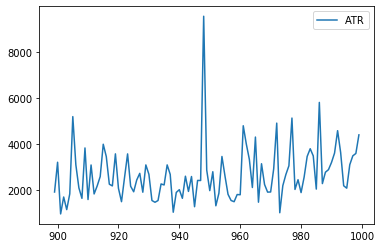

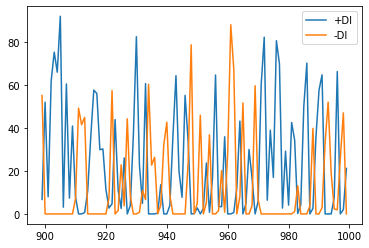

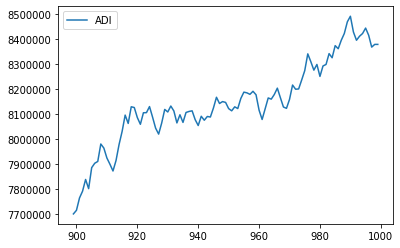

In [77]:
# Plot Average Divergence Index
rev_daily.iloc[start_index:end_index + 1].plot(y=[atr_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[pdi_lab, ndi_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[adi_lab])


In [78]:
#Fibonacci Retracement
#Ichimoku

# Plot everything together

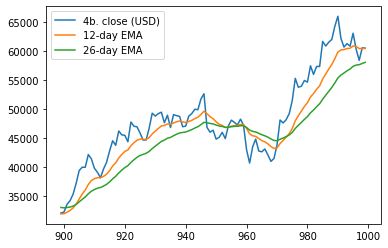

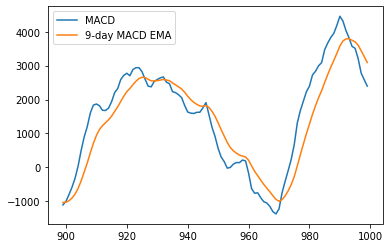

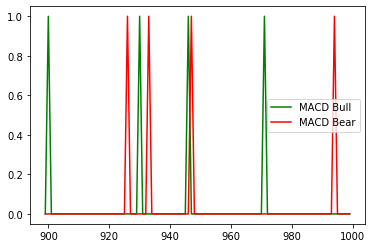

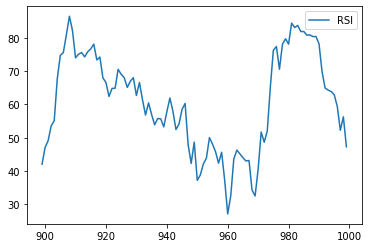

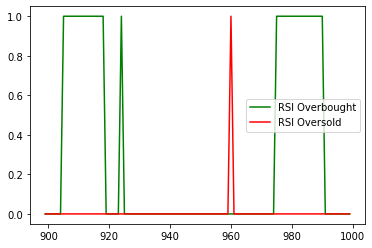

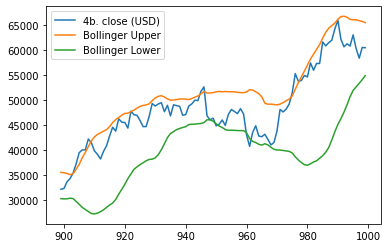

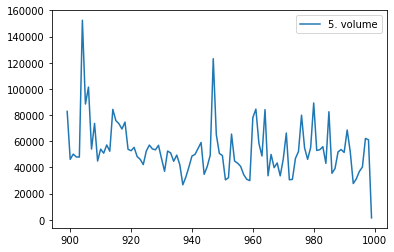

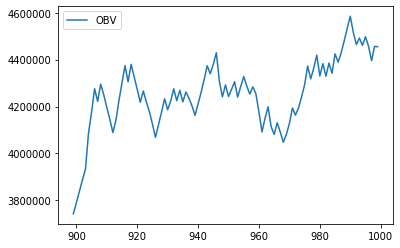

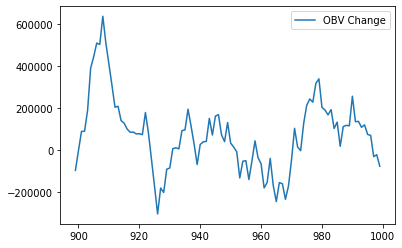

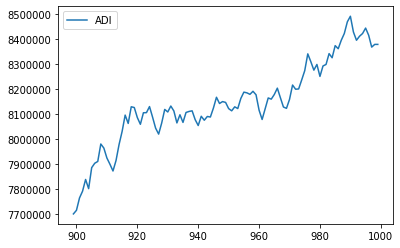

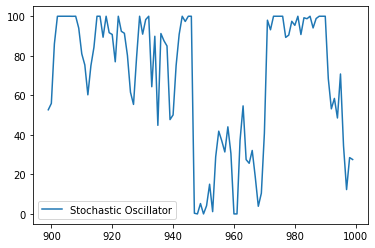

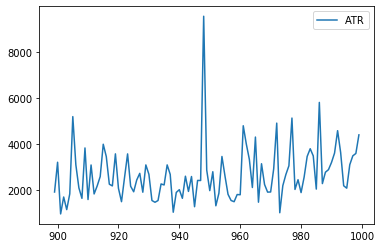

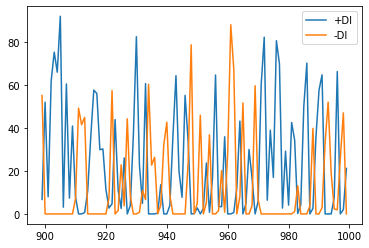

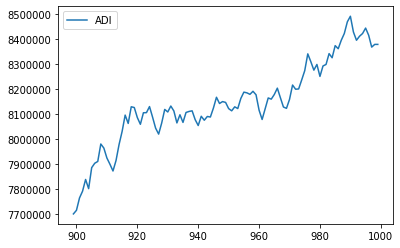

In [79]:
# All plots together
num_days = 100
end_index = rev_daily["index"][0]
start_index = end_index - num_days
rev_daily.iloc[start_index:end_index + 1].plot(y=[close_lab, "12-day EMA", "26-day EMA"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD", "9-day MACD EMA"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD Bull", "MACD Bear"], color=["g", "r"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI Overbought", "RSI Oversold"], color=["g", "r"])
rev_daily.iloc[start_index:end_index + 1].plot(y=[close_head, boll_up_lab, boll_low_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[vol_head])
rev_daily.iloc[start_index:end_index + 1].plot(y=[obv_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[obv_change_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[adi_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[sto_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[atr_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[pdi_lab, ndi_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[adi_lab])
